# Alex Joseph

## Adult Dataset (Based on the 1994 American Census)

### Features and Label

- age: continuous.
- workclass:categorical
- fnlwgt: continuous.
- education:categorical
- education-num: continuous.
- marital-status:categorical
- occupation: categorical
- relationship: categorical
- race:categorical
- sex: categorical
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: categorical
- target: categorical (whether a person earns more than $50000 or not)

### Importing necessary packages

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Adult_Dataset.csv")
data.shape

(48842, 15)

In [3]:
data.head()

,age,employment,fnlwgt,edu,edu_num,marital_stat,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory Data Analysis and Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   employment      48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   edu             48842 non-null  object
 4   edu_num         48842 non-null  int64 
 5   marital_stat    48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  cap_gain        48842 non-null  int64 
 11  cap_loss        48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native          48842 non-null  object
 14  target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.describe()

,age,fnlwgt,edu_num,cap_gain,cap_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


We shall look at the target variable and how the different values are.

In [6]:
from collections import Counter

Counter(data.target)

Counter({' <=50K': 24720, ' >50K': 7841, ' <=50K.': 12435, ' >50K.': 3846})

We can see that there are 4 categories when there should only be two. We shall rectify this and shall denote 1 if the salary is above 50K (>50K) and 0 if it's less than or equal to 50K (<= 50K)

In [7]:
data['target'].replace([' <=50K', ' <=50K.', ' >50K', ' >50K.'],[0,0,1,1], inplace=True)

Counter(data.target)

Counter({0: 37155, 1: 11687})

As we can see, more than 75% of the candidates have lower than 50K income

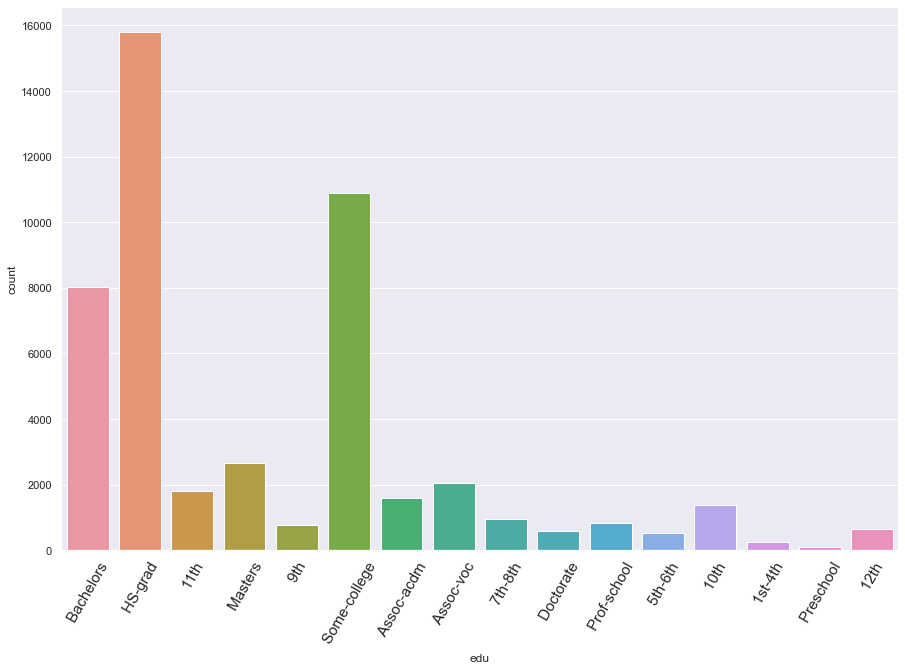

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticklabels(labels= data.edu, rotation=60, fontsize=15)
sns.countplot(data.edu);

It appears that a large portion of the sample has some college degree or at least are high school graduates

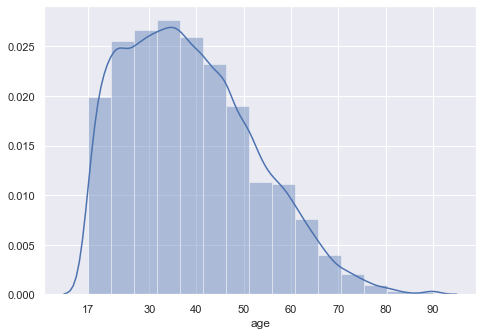

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks([17, 30, 40, 50, 60, 70, 80, 90 ])
sns.distplot(data.age, bins=15);

We can see that most portion of the dataset is occuppied by people of age between 17 and 50

In [10]:
Counter(data.edu).most_common()

[(' HS-grad', 15784),
 (' Some-college', 10878),
 (' Bachelors', 8025),
 (' Masters', 2657),
 (' Assoc-voc', 2061),
 (' 11th', 1812),
 (' Assoc-acdm', 1601),
 (' 10th', 1389),
 (' 7th-8th', 955),
 (' Prof-school', 834),
 (' 9th', 756),
 (' 12th', 657),
 (' Doctorate', 594),
 (' 5th-6th', 509),
 (' 1st-4th', 247),
 (' Preschool', 83)]

In [11]:
Counter(data.edu_num).most_common()

[(9, 15784),
 (10, 10878),
 (13, 8025),
 (14, 2657),
 (11, 2061),
 (7, 1812),
 (12, 1601),
 (6, 1389),
 (4, 955),
 (15, 834),
 (5, 756),
 (8, 657),
 (16, 594),
 (3, 509),
 (2, 247),
 (1, 83)]

As we can see, both these columns are one and the same. Therefore, we can drop one of these columns. Since we have to change the column with the string later on if we keep it, we shall drop that column

In [12]:
data.drop("edu", axis=1, inplace=True)

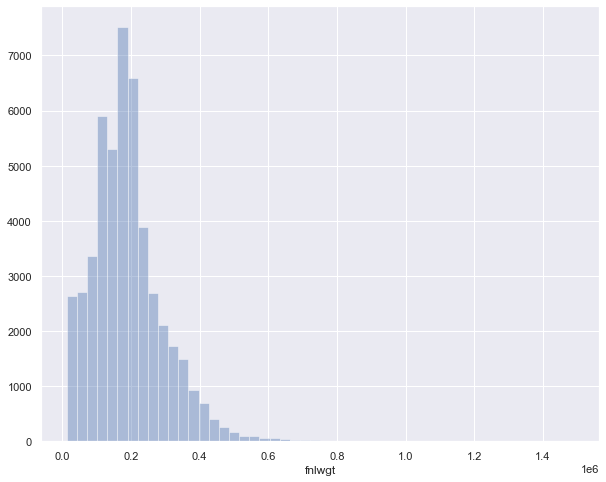

In [13]:
fig,ax = plt.subplots(figsize=(10,8))
sns.distplot(data.fnlwgt, kde=False);

In [14]:
# Calculating the number of records with final weight more than 800000

data[data.fnlwgt >= 600000].shape[0]

217

In [15]:
# Calculating the number of records with final weight more than 800000 and more than 50K salary

data[(data.fnlwgt >= 600000)& (data.target==1)].shape

(45, 14)

In [16]:
# Removing the records with more than 600000 final weight

index = data[data.fnlwgt >= 600000].index
data.drop(index= index, inplace=True)

In [17]:
# Exploring the string data

Counter(data.marital_stat)

Counter({' Never-married': 16037,
         ' Married-civ-spouse': 22294,
         ' Divorced': 6607,
         ' Married-spouse-absent': 623,
         ' Separated': 1519,
         ' Married-AF-spouse': 37,
         ' Widowed': 1508})

In [18]:
Counter(data.employment)

Counter({' State-gov': 1969,
         ' Self-emp-not-inc': 3854,
         ' Private': 33741,
         ' Federal-gov': 1424,
         ' Local-gov': 3128,
         ' ?': 2786,
         ' Self-emp-inc': 1692,
         ' Without-pay': 21,
         ' Never-worked': 10})

In [19]:
Counter(data.occupation)

Counter({' Adm-clerical': 5589,
         ' Exec-managerial': 6061,
         ' Handlers-cleaners': 2060,
         ' Prof-specialty': 6152,
         ' Other-service': 4895,
         ' Sales': 5479,
         ' Craft-repair': 6086,
         ' Transport-moving': 2341,
         ' Farming-fishing': 1485,
         ' Machine-op-inspct': 3008,
         ' Tech-support': 1439,
         ' ?': 2796,
         ' Protective-serv': 977,
         ' Armed-Forces': 15,
         ' Priv-house-serv': 242})

In [20]:
Counter(data.relationship)

Counter({' Not-in-family': 12526,
         ' Husband': 19638,
         ' Wife': 2325,
         ' Own-child': 7544,
         ' Unmarried': 5089,
         ' Other-relative': 1503})

As we can see, the data has a ' ' (space) infront of the actual value. We will remove this

In [21]:
data.replace(" ","", regex=True, inplace=True)

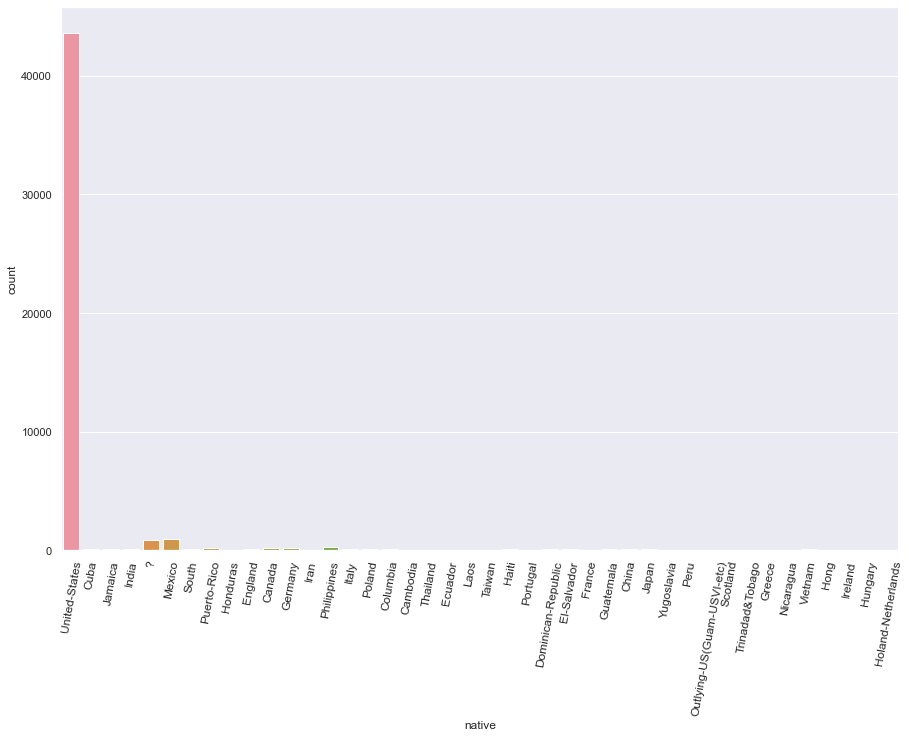

In [22]:
# Checking the ethnic distribution

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticklabels(labels= data.native, rotation=80, fontsize=12)
sns.countplot(data.native);

We can see that a huge overwhelming majority of the population in the dataset is of american origin. Therefore, taking this feature for modelling might not yield us good results

In [23]:
print("US Natives:",(data[data.native == ' United-States'].shape[0]))
us = data[data.native == ' United-States'].shape[0]
print("Total Number of Persons:", data.shape[0])
tot = data.shape[0]
print("Percentage of US natives in the sample: {0:1.2f}".format(us*100/tot))

US Natives: 0
Total Number of Persons: 48625
Percentage of US natives in the sample: 0.00


89 percent of the given dataset are US natives. But in the 1990s, the case was not so. The US natives were only slightly more than 80% of the total population. Therefore, our dataset resembles more of the demography of the US in the 1940s and 1950s than the 90s

In [24]:
Counter(data.sex)

Counter({'Male': 32507, 'Female': 16118})



In our analysis, we saw that the there are '?' in a lot of features. Let us examine it more

In [25]:
print("Data with '?' :", data[data.employment == '?'].shape)
print("Data with '?' with salary less than 50K :",data[(data.employment == '?') & (data.target == 0)].shape)

Data with '?' : (2786, 14)
Data with '?' with salary less than 50K : (2521, 14)


In [26]:
# Dropping the rows with such data

index = data[(data.employment == '?') & (data.target == 0)].index
data.drop(index=index, inplace=True)

## Data Preprocessing

In [27]:
data.head()

,age,employment,fnlwgt,edu_num,marital_stat,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native,target
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [28]:
# Data Preprocessing

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

d_type = data['employment'].dtype # adding the dtype of the columns to be encoded into a variable so that 
                                  # only those columns will be encoded

for i in data.columns:
    if data[i].dtype == d_type:
        data[i] = enc.fit_transform(data[i])

In [29]:
data.head()

,age,employment,fnlwgt,edu_num,marital_stat,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native,target
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0


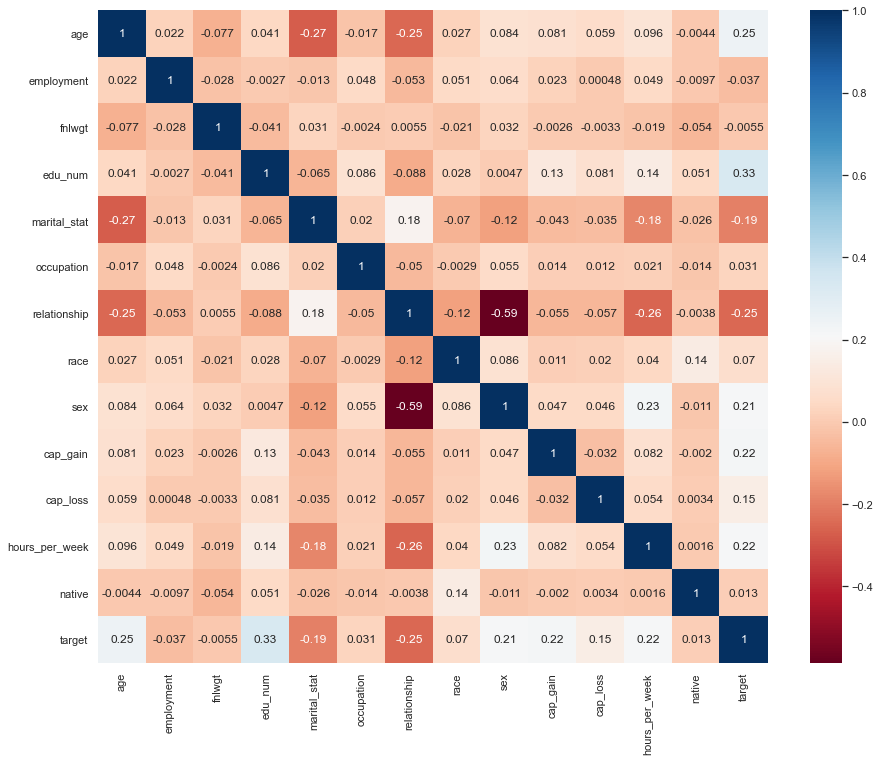

In [30]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(data.corr(), annot=True, cmap='RdBu');

None of the features seem to be significantly correlated to any other feature so that it would affect our model.

In [31]:
# Splitting the data into Features and Label

X = data.iloc[:, :-1]

# The native place, capital loss, sex, race and employment were found to not contribute to the model.
# Therefore, we are dropping these features

X.drop(['employment', 'native','cap_loss', 'sex','race'], axis=1, inplace=True)
y = data.iloc[:, -1]

In [32]:
# Checking the distribution of the labels

Counter(y)

Counter({0: 34462, 1: 11642})

In [33]:
# Employing under-sampling technique to make the dataset balanced

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus= rus.fit_resample(X, y)

In [34]:
Counter(y_rus)

Counter({0: 11642, 1: 11642})

In [35]:
# Splitting the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=0)

### Scaling

As we have seen, some of the features have a high magnitude while some have very small. We should fix this issue before modelling. Therefore, we shall employ scaling on the dataset.

In [36]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [37]:
#Scaling the training set
scale = scale.fit(X_train)
X_train_sc = pd.DataFrame(scale.transform(X_train), columns=X_train.columns)
X_train_sc.head()

,age,fnlwgt,edu_num,marital_stat,occupation,relationship,cap_gain,hours_per_week
0,-0.271438,0.482976,0.151089,-0.312216,1.471511,2.332103,-0.200243,-0.445083
1,-1.210359,-0.687046,-0.618800,0.429859,-0.005325,-0.121134,-0.200243,-0.196490
2,-0.662655,-0.758011,-0.233856,1.171935,-1.482162,-0.121134,-0.200243,-1.025131
3,0.041535,-0.374288,1.690866,-0.312216,0.733093,-0.734443,-0.200243,0.632151
4,-1.288602,0.421436,-1.773633,-1.796366,-0.251465,1.718794,-0.200243,1.295064


In [38]:
#Scaling the testing set

X_test_sc = pd.DataFrame(scale.transform(X_test), columns=X_train.columns)
X_test_sc.head()

,age,fnlwgt,edu_num,marital_stat,occupation,relationship,cap_gain,hours_per_week
0,0.198022,0.199775,0.920977,-0.312216,0.733093,-0.734443,-0.200243,0.632151
1,-0.427925,-0.818787,-0.233856,1.171935,-0.005325,-0.121134,-0.200243,-0.196490
2,-0.897385,-0.439059,0.920977,-0.312216,-0.251465,-0.734443,0.209053,3.118074
3,-1.445089,-0.677692,0.920977,1.171935,0.733093,1.105484,-0.200243,-2.019500
4,0.198022,-0.390135,-0.618800,-1.796366,-1.482162,1.718794,-0.200243,-0.196490


## Modelling

We are employing Logistic Regression, K-Nearest Neighbor, Decision Tree, Random Forest, XGBoost, Multi-Level Perceptron and Support Vector Machine

In [39]:
# Importing the packages for the calculating accuracy, recall and precision

from sklearn.metrics import accuracy_score, classification_report

### Logistic Regression

In [40]:
# Importing Logistic Regression Model and training it

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.025, tol=0.0001)
log_reg.fit(X_train_sc, y_train)
y_predict = log_reg.predict(X_test_sc)

In [41]:
# Calculating the accuracy score

accuracy_score(y_test, y_predict)

0.7526304487867727

In [42]:
# Crosstab for seeing the Test vs the Predicted classification

pd.crosstab(y_test, y_predict)

col_0,0,1
target,,
0,1755,573
1,579,1750


In [43]:
# Classification report 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2328
           1       0.75      0.75      0.75      2329

    accuracy                           0.75      4657
   macro avg       0.75      0.75      0.75      4657
weighted avg       0.75      0.75      0.75      4657



### K-nearest Neighbor

In [44]:
# Importing K-Nearest Neighbor Classifier model and training it

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, p=1)
knn.fit(X_train_sc, y_train)
y_predict = knn.predict(X_test_sc)
accuracy_score(y_test, y_predict)

0.7927850547562809

In [45]:
# Crosstab for seeing the Test vs the Predicted classification

pd.crosstab(y_test, y_predict)

col_0,0,1
target,,
0,1889,439
1,526,1803


In [46]:
# Classification report 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2328
           1       0.80      0.77      0.79      2329

    accuracy                           0.79      4657
   macro avg       0.79      0.79      0.79      4657
weighted avg       0.79      0.79      0.79      4657



### Decision Tree

In [47]:
# Importing the Decision Tree Classifier Model and training it

from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(X_train_sc, y_train)
y_predict = dec_tree.predict(X_test_sc)
accuracy_score(y_test, y_predict)

0.7474769164698304

In [48]:
# Crosstab for seeing the Test vs the Predicted classification

pd.crosstab(y_test, y_predict)

col_0,0,1
target,,
0,1731,597
1,579,1750


In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      2328
           1       0.75      0.75      0.75      2329

    accuracy                           0.75      4657
   macro avg       0.75      0.75      0.75      4657
weighted avg       0.75      0.75      0.75      4657



### Random Forest

In [50]:
# Importing the Random Forest Classifier model and training it

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0, min_samples_split=2, min_samples_leaf=3)
rfc.fit(X_train_sc, y_train)
y_predict = rfc.predict(X_test_sc)
accuracy_score(y_test, y_predict)

0.8232767876315225

In [51]:
pd.DataFrame(rfc.feature_importances_, index = X.columns).sort_values(by=0,ascending=False)

,0
relationship,0.182202
marital_stat,0.161593
age,0.160846
edu_num,0.156840
cap_gain,0.102952
fnlwgt,0.093010
hours_per_week,0.074730
occupation,0.067827


In [52]:
# Crosstab for seeing the Test vs the Predicted classification

pd.crosstab(y_test, y_predict)

col_0,0,1
target,,
0,1853,475
1,348,1981


In [53]:
# Classification report 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2328
           1       0.81      0.85      0.83      2329

    accuracy                           0.82      4657
   macro avg       0.82      0.82      0.82      4657
weighted avg       0.82      0.82      0.82      4657



### XG Boost

In [54]:
# ImportingXGBoost Classifier and training it

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0,n_estimators=10)
xgb.fit(X_train_sc, y_train)
y_predict = xgb.predict(X_test_sc)
accuracy_score(y_test, y_predict)

0.8273566673824351

In [55]:
# Crosstab for seeing the Test vs the Predicted classification

pd.crosstab(y_test, y_predict)

col_0,0,1
target,,
0,1837,491
1,313,2016


In [56]:
# Classification report 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2328
           1       0.80      0.87      0.83      2329

    accuracy                           0.83      4657
   macro avg       0.83      0.83      0.83      4657
weighted avg       0.83      0.83      0.83      4657



### MLP Classifier

In [57]:
# Importing the MLP Classifier Model and training it

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20,20), 
                    activation='logistic')
mlp.fit(X_train_sc, y_train)
y_predict = mlp.predict(X_test_sc)
accuracy_score(y_test, y_predict)

0.8170496027485505

In [58]:
# Crosstab for seeing the Test vs the Predicted classification

pd.crosstab(y_test, y_predict)

col_0,0,1
target,,
0,1788,540
1,312,2017


In [59]:
# Classification report 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      2328
           1       0.79      0.87      0.83      2329

    accuracy                           0.82      4657
   macro avg       0.82      0.82      0.82      4657
weighted avg       0.82      0.82      0.82      4657



### Support Vector Classifier

In [60]:
# Importing the Support Vector Machine model and training it

from sklearn.svm import SVC

svc = SVC(C=10, gamma='scale')
svc.fit(X_train_sc, y_train)
y_predict = svc.predict(X_test_sc)
accuracy_score(y_test, y_predict)

0.8179085248013743

In [61]:
# Crosstab for seeing the Test vs the Predicted classification

pd.crosstab(y_test, y_predict)

col_0,0,1
target,,
0,1768,560
1,288,2041


In [62]:
# Classification report 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      2328
           1       0.78      0.88      0.83      2329

    accuracy                           0.82      4657
   macro avg       0.82      0.82      0.82      4657
weighted avg       0.82      0.82      0.82      4657



## Cross Validation

In [63]:
# Cross validation to find the model with the best overall result

X_scaled = pd.DataFrame(scale.fit_transform(X_rus), columns=X_rus.columns)
y_scaled = y_rus

models = [log_reg, knn, dec_tree, rfc, xgb, mlp, svc]

from sklearn.model_selection import StratifiedKFold, cross_val_score
scores = []
for model in models:
    cv_score = cross_val_score(model, X_scaled, y_scaled, cv=5)
    scores.append(cv_score)

In [64]:
# Making all the information from the cross_val_score into a DataFrame 

index = ['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree Classifier',
         'Random Forest Classifier', 'XGBoost Classifier','MLP Classifier','Support Vector Classifier']

summary = pd.DataFrame([scores[i] for i in range(len(scores))], index=index)
summary['mean'] = summary.mean(axis=1)
summary['std'] = summary.std(axis=1)
summary

,0,1,2,3,4,mean,std
Logistic Regression,0.750483,0.754563,0.757355,0.754992,0.742912,0.752061,0.005081
K-Nearest Neighbor,0.799227,0.795362,0.799012,0.791926,0.796177,0.796341,0.002681
Decision Tree Classifier,0.762079,0.767662,0.759072,0.759287,0.750215,0.759663,0.005649
Random Forest Classifier,0.829289,0.824350,0.828860,0.821988,0.826890,0.826276,0.002765
XGBoost Classifier,0.832295,0.829933,0.832295,0.824565,0.825387,0.828895,0.003324
MLP Classifier,0.822847,0.817909,0.822633,0.817050,0.818084,0.819704,0.002504
Support Vector Classifier,0.820271,0.818123,0.815976,0.809319,0.817655,0.816269,0.003735


## ROC Curve and ROC AUC Score

As we can see, Random Forest Classifier and XGBoost Classifier are giving us the best overall outputs. So let us take XGBoost Classifier and calculate the Reciever Operating Characteristics Curve (ROC Curve) and the ROC-AUC Score

In [65]:
y_predict_proba = xgb.predict_proba(X_test_sc)[:, 1]
y_predict_proba

array([0.86625445, 0.14194615, 0.7502387 , ..., 0.5128739 , 0.05322317,
       0.37997693], dtype=float32)

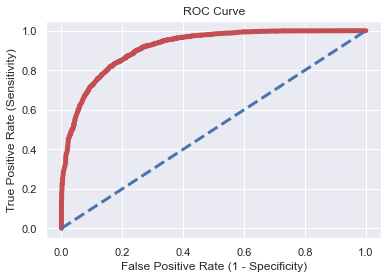

In [66]:
# Importing the packages for plotting ROC curve and for obtaining the area under the curve (ROC AUC)

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_predict_proba)

#Plotting the ROC Curve

plt.plot(fpr, tpr, 'r', lw=5)
plt.plot([0,1],[0,1], 'b--', lw=3)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)");

In [67]:
#Area under the curve

print("ROC AUC Score: ", roc_auc_score(y_test, y_predict_proba))

ROC AUC Score:  0.9148123392633447


In [68]:
from sklearn.pipeline import Pipeline, make_pipeline

pipe_xgb_sc = make_pipeline(StandardScaler(), XGBClassifier(random_state=0,n_estimators=10))
pipe_xgb_sc.fit(X_train, y_train) # Applying scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])
pipe_xgb_sc.score(X_test, y_test)

0.8273566673824351

In [ ]:
########## END OF PROJECT ##########